# Repaso Módulo 1 - Optimización.
---

## Primer punto. Optimización de funciones escalares usando `sympy`.

**Enunciado.** Calcular **las dimensiones** del rectángulo de área máxima que puede inscribirse dentro de un semicírculo de radio 2.

Note que **las dimensiones** son base $b = 2x$ y altura $h = y$. Ver la siguiente figura.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

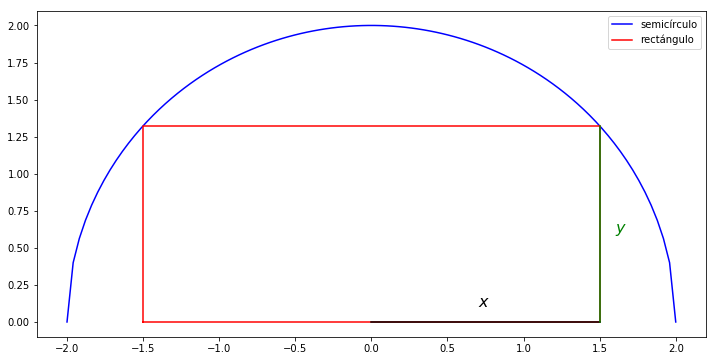

In [2]:
x = np.linspace(-2, 2, 100)
y = np.sqrt(4 - x**2)

xr = [-1.5, -1.5, 1.5, 1.5, -1.5]
yr = [0, np.sqrt(4 - 1.5**2), np.sqrt(4 - 1.5**2), 0, 0]

xx = [0, 1.5]
yx = [0, 0]

xy = [1.5, 1.5]
yy = [0, np.sqrt(4 - 1.5**2)]

plt.figure(figsize = (12, 6))
plt.plot(x, y, 'b', label = 'semicírculo')
plt.plot(xr, yr, 'r', label = 'rectángulo')
plt.plot(xx, yx, 'k')
plt.plot(xy, yy, 'g')
plt.text(0.7, 0.1, '$x$', fontsize = 16)
plt.text(1.6, 0.6, '$y$', fontsize = 16, color = 'g')
plt.legend(loc = 'best')
plt.show()

**Punto 1.** Encuentre el área del rectángulo en función de la variable $x$, $A_R(x)$. También provea el dominio de la función para que tenga sentido.

Realice este punto usando fórmulas en $\LaTeX$, en celdas Markdown.

---
Se desea maximizar el área del rectángulo
$$
A=bh=2xy,
$$
sin embargo, como el rectángulo está inscrito en un semicirculo de radio 2, se escribe $y=\sqrt{2^2-x^2}$ con base en el teorema de Pitágoras. Resultando en
$$
A=2x\sqrt{2^2-x^2},
$$
para $0\leq x\leq2$.

---

**Punto 2.** Usando `sympy` maximice la función $A_R(x)$ en su dominio.

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Una forma de definir la función a optimizar
def A(x):
    return 2*x*(2**2-x**2)**0.5

```python
# La otra forma de definirla
sym.var('x',real=True)
A=2*x*(2**2-x**2)**0.5
```

**Nota técnica:** Las dos celdas de código anteriores no pueden coexistir a la par, ya que una sobreescribe a la otra. Al definir $A$ a partir de $x$ simbólica, deja de existir la función ejecutable $A(x)$.

Nos decidimos por la función ejecutable (ya que no es necesario convertirla a numérica para graficar).

In [7]:
A(x)

2*x*(4 - x**2)**0.5

In [8]:
# Derivamos
dA=sym.diff(A(x),x)
dA

-2.0*x**2*(4 - x**2)**(-0.5) + 2*(4 - x**2)**0.5

In [9]:
# Encontramos el punto crítico
c=sym.solve(dA,x)
c

[-1.41421356237310, 1.41421356237310]

In [10]:
# Accedemos al segundo valor de 'c'
c[1]

1.41421356237310

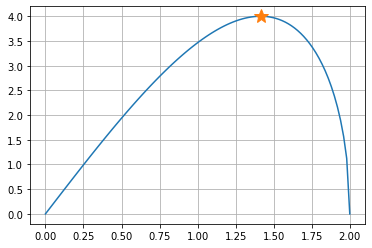

In [11]:
# Graficamos
xn=np.linspace(0,2,100)
An=A(xn)
plt.plot(xn,An)
plt.plot(c[1],A(c[1]),'*',ms=15)
plt.grid()

In [12]:
# Derivamos
ddA=sym.diff(A(x),x,2) # sym.diff(A(x),x,x)
ddA

-x*(2.0*x**2*(4 - x**2)**(-1.5) + 6.0*(4 - x**2)**(-0.5))

```python
# Derivando la primera derivada
ddA=sym.diff(dA,x)
ddA
```

In [13]:
# Sustituyendo el punto crítico en la segunda derivada
ddA.subs(x,c[1])

-8.00000000000000

Ya que la segunda derivada en el punto de interés es negativa, se trata de un máximo.

---

**Punto 3.** ¿Cuáles son las dimensiones $b$ y $h$ del rectángulo resultante?

In [14]:
# Base 'b'
2*c[1]

2.82842712474619

In [15]:
# Altura 'h'
(2**2-c[1]**2)**0.5

1.41421356237309

In [16]:
# Área máxima
A(c[1])

4.00000000000000

El área máxima es $A=4.0$ y se obtiene con una base $b=2.8284$ y altura $h=1.4142$.

---

## Segundo punto. Programación lineal.

**Enunciado.** Considere un restaurante que abre los siete días de la semana. Con base en la experiencia, el mínimo número de trabajadores necesarios en cada día de la semana es:

In [10]:
import pandas as pd

In [4]:
df = pd.DataFrame(columns=['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], index = ['Num_trabajadores'])
df.loc['Num_trabajadores', :] = [14, 13, 15, 16, 19, 18, 11]
df

,Lunes,Martes,Miercoles,Jueves,Viernes,Sábado,Domingo
Num_trabajadores,14,13,15,16,19,18,11


Cada trabajador labora cinco días consecutivos, y luego descansa dos, repitiendo este patrón indefinidamente. Se debe minimizar la cantidad de trabajadores totales en el restaurante.

*Definición de variables*: enumeramos los días del uno al siete (Lunes - 1, Martes - 2, ..., Domingo - 7). Sea $x_i$ el número de trabajadores que empieza su turno de cinco días el día $i$.

**Punto 1.** Escriba la función a minimizar junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en LaTeX, en celdas Markdown). Además escriba el problema en la forma 
\begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}
\end{equation}

proporcionando $\boldsymbol{c}$, $\boldsymbol{A}$ y $\boldsymbol{b}$ ($\boldsymbol{A}_{eq}$ y $\boldsymbol{b}_{eq}$, de ser necesario) como arreglos de `NumPy` (no es necesario escribir en LaTeX el problema en la forma indicada, solo proporcionar las matrices como arreglos de `NumPy`).

---
Se desea minimizar la cantidad total de trabajadores, es decir
$$
\min_{x_i}\sum_{i=1}^7x_i,
$$
cumpliendo las siguientes restricciones:
* Los trabajadores que inician laborando el lunes ($x_1$), se suman a los que inician el martes ($x_2$), estos dos se suman a los que inician el miércoles ($x_3$), repitiendo este patrón hasta el viernes ($x_5$), es decir,
$$
\sum_{i=1}^5
$$
debe ser al menos la cantidad de trabajadores necesaria para cubrir la demanda del viernes (19).
$$
x_1+x_2+x_3+x_4+x_5\geq19
$$
* Los trabajadores que inician laborando el martes ($x_2$), se suman a los que inician laborando los cuatro días consecutivos, los cuales deberán cumplir la demanda de este último.
$$
x_2+x_3+x_4+x_5+x_6\geq18
$$
* El patrón anterior se repite hasta describir la semana completa
\begin{eqnarray*}
x_3+x_4+x_5+x_6+x_7&\geq&11\qquad\mathrm{domingo}\\
x_4+x_5+x_6+x_7+x_1&\geq&14\qquad\mathrm{lunes}\\
x_5+x_6+x_7+x_1+x_2&\geq&13\qquad\mathrm{martes}\\
x_6+x_7+x_1+x_2+x_3&\geq&15\qquad\mathrm{miércoles}\\
x_7+x_1+x_2+x_3+x_4&\geq&16\qquad\mathrm{jueves}
\end{eqnarray*}

In [17]:
c=np.array([1,1,1,1,1,1,1])
b=-np.array([19,18,11,14,13,15,16])
A=-np.array([[1,1,1,1,1,0,0],
             [0,1,1,1,1,1,0],
             [0,0,1,1,1,1,1],
             [1,0,0,1,1,1,1],
             [1,1,0,0,1,1,1],
             [1,1,1,0,0,1,1],
             [1,1,1,1,0,0,1]])

**Punto 2.** Resuelva el problema utilizando la función `linprog`. ¿Cuántos trabajadores son necesarios en total?

In [19]:
import scipy.optimize as opt

In [20]:
opt.linprog(c,A,b,method='simplex')

     con: array([], dtype=float64)
     fun: 22.0
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([0., 0., 4., 0., 0., 0., 0.])
  status: 0
 success: True
       x: array([4., 3., 5., 4., 3., 3., 0.])

El número mínimo de trabajadores es 22 y se cumple con
* 4 trabajadores iniciando el lunes,
* 3 el martes,
* 5 el miércoles,
* 4 el jueves,
* 3 el viernes y
* 3 el sábado.

---

## Tercer punto. Ajuste de curvas.

**Enunciado**. El archivo `Salarios_minimos.csv` contiene datos simplificados de los salarios mínimos desde 1986 a la fecha. La primer columna corresponde a los años, la segunda a dichos salarios. La información completa se encuentra en

https://idconline.mx/laboral/salarios-minimos/salarios-minimos-1986-2007.

**Punto 1.** Importar los datos en un DataFrame de pandas.

In [21]:
import pandas as pd

In [22]:
datos=pd.read_csv('Salarios_minimos.csv')
datos.head()

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90


In [23]:
datos.tail()

,Periodo,Salario
29,2014.0,67.29
30,2015.0,70.10
31,2016.0,73.04
32,2017.0,80.04
33,2018.0,88.36


**Punto 2.** Usando los años como variable independiente $x$ y los salarios mínimos como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

Mostrar en un solo gráfico los datos del archivo contra los años, y los polinomios ajustados.

Graficar el error cuadrático acumulado contra el número de términos. ¿Cuál es el polinomio que mejor se ajusta?

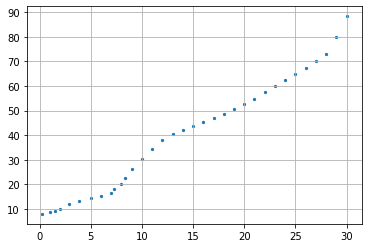

In [24]:
x=datos['Periodo']-1988
y=datos['Salario']
plt.scatter(x,y,s=5)
plt.grid()

In [25]:
def f(x,beta): # Polinomio a ajustar
    n=len(beta)-1
    X=np.array([x**i for i in range(n+1)])
    return beta@X

def obj(beta,x,y): # Mínimos cuadrados
    return np.sum((y-f(x,beta))**2)

In [26]:
sol=[]
for n in range(3):
    beta0=np.random.rand(n+2)
    sol.append(opt.minimize(obj,beta0,args=(x,y)))

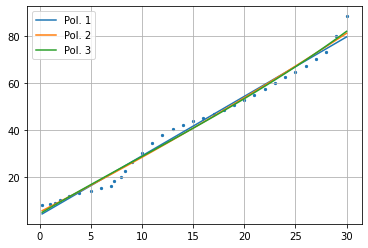

In [27]:
plt.scatter(x,y,s=5)
for n in range(3):
    plt.plot(x,f(x,sol[n].x),label='Pol. '+str(n+1))
plt.legend()
plt.grid()

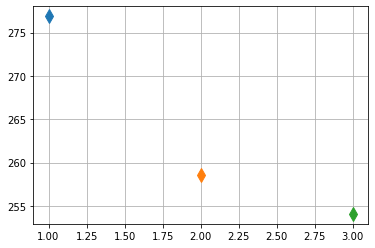

In [30]:
for n in range(3):
    plt.plot(n+1,sol[n].fun,'d',ms=10)
plt.grid()

In [31]:
sol[0].x # Polinomio de grado uno

array([3.71557814, 2.52832882])

In [32]:
sol[1].x

array([5.16416879, 2.2190291 , 0.01042461])

In [33]:
sol[2].x

array([ 4.38105201e+00,  2.55802795e+00, -1.86352047e-02,  6.51692220e-04])

El mejor polinomio que se ajusta, tomando en cuenta el error cuadrático acumulado, es el de grado 3. Sin embargo, observando los coeficientes, vemos que después de $\beta_1$, las potencias de $x$ dejan de tomar relevancia, por lo que una buena elección es el polinomio de grado 1.

---

**Punto 3.** Con los polinomios ajustados en el punto anterior, estime el salario mínimo en el año 2019 y compare con el dato real 102.68.

¿Cuál polinomio estima mejor este dato? ¿Es el polinomio que mejor se ajusta? Concluya.

In [34]:
f(2019-1988,sol[0].x) # Predicción lineal

82.09377167155846

In [35]:
f(2019-1988,sol[1].x) # Predicción cuadrática

83.97212186688594

In [36]:
f(2019-1988,sol[2].x) # Predicción cúbica

85.1860497204111

El polinomio que más se acerca es el de grado tres. Podemos concluir que hace falta implementar otros modelos para predección.